In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv("data/AIML Dataset.csv")

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.shape

(6362620, 11)

In [14]:
round(df["isFraud"].value_counts()[1] / df.shape[0] * 100, 2)

np.float64(0.13)

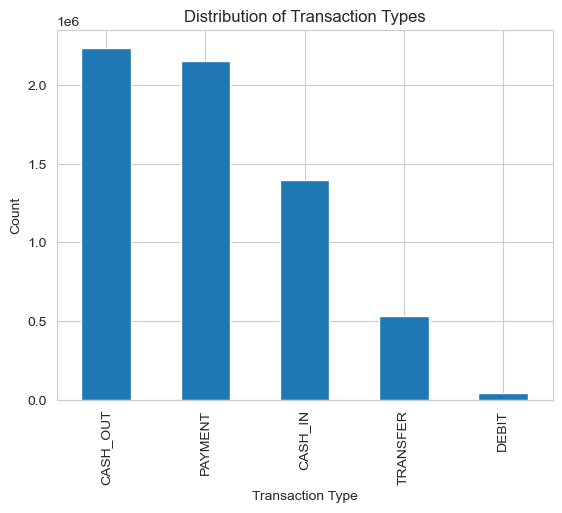

In [15]:
df["type"].value_counts().plot(kind='bar')
plt.title('Distribution of Transaction Types')  
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

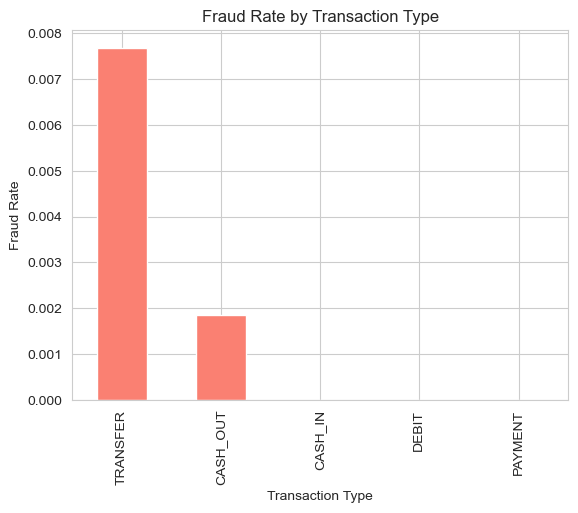

In [16]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', color='salmon')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

In [17]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

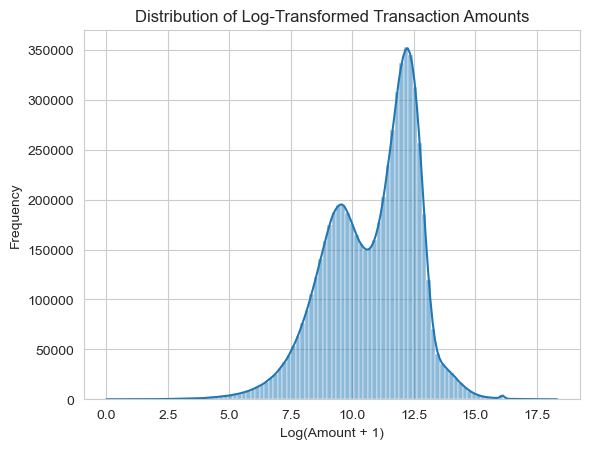

In [19]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True)
plt .title('Distribution of Log-Transformed Transaction Amounts')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

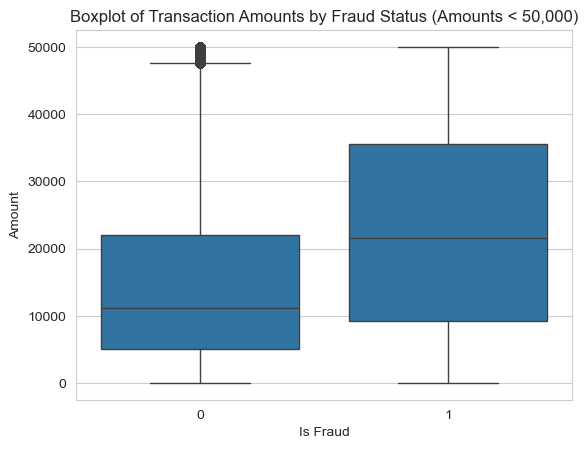

In [20]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title('Boxplot of Transaction Amounts by Fraud Status (Amounts < 50,000)')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

In [21]:
df["balanceDiffOriginal"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDestination"] = df["oldbalanceDest"] - df["newbalanceDest"]


In [22]:
(df["balanceDiffOriginal"]<0).sum()  

np.int64(1399253)

In [24]:
(df["balanceDiffDestination"]<0).sum()

np.int64(2806464)

In [25]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


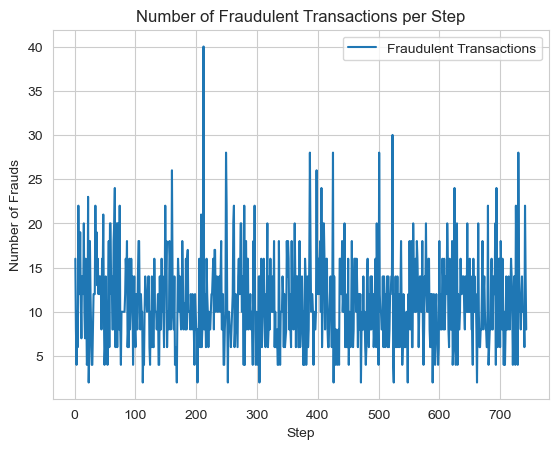

In [29]:
frauds_per_step = df[df["isFraud"] == 1].groupby("step").size().sort_index()

plt.plot(frauds_per_step.index, frauds_per_step.values, label='Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions per Step')
plt.xlabel('Step')
plt.ylabel('Number of Frauds')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
df.drop(columns=["step"], inplace=True)

In [31]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [39]:
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [40]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [41]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [44]:
fraud_types = df[df["type"].isin(['TRANSFER', 'CASH_OUT'])]
fraud_types

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,-46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,-2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,-339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

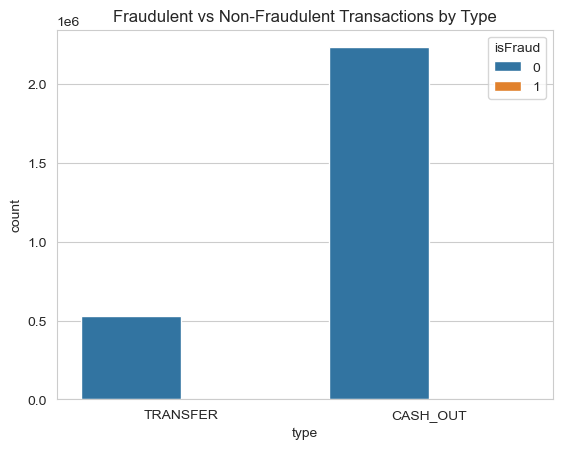

In [45]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title('Fraudulent vs Non-Fraudulent Transactions by Type')
plt.show()

In [46]:
corr= df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]].corr()

In [47]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000


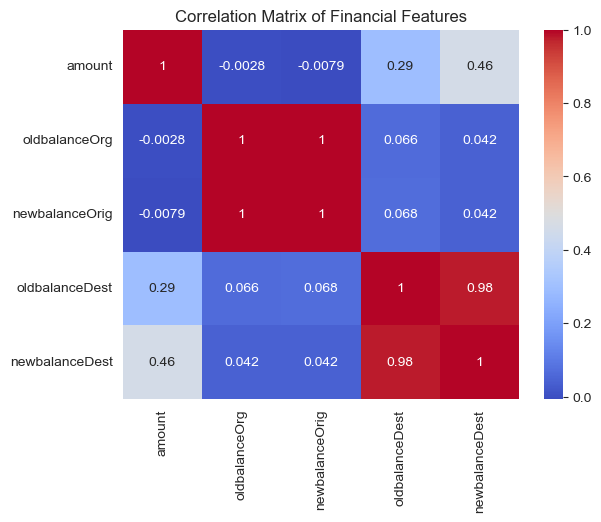

In [48]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Financial Features')
plt.show()

In [51]:
zero_after_transdf = df[
    (df["oldbalanceDest"] > 0) &
    (df["newbalanceDest"] == 0) &
    (df["type"].isin(['TRANSFER', 'CASH_OUT']))
]



In [52]:
len(zero_after_transdf)

10817

In [55]:
zero_after_transdf.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
19,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.0,0.0,0,0,705.00,22425.0
51,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.0,0.0,0,0,20411.53,25742.0
70,CASH_OUT,47458.86,C527211736,209534.84,162075.98,C2096057945,52120.0,0.0,0,0,47458.86,52120.0
71,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.0,0.0,0,0,136872.93,217806.0


In [56]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder    

In [59]:
df_model = df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"],axis=1   )


In [60]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOriginal,balanceDiffDestination
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [61]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest" ]

In [62]:
y = df_model["isFraud"]
X = df_model.drop(columns=["isFraud"], axis=1)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  stratify=y)

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)



In [65]:
pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [66]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
y_pred = pipeline.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [69]:
confusion_matrix(y_test, y_pred)

array([[1802151,  104171],
       [    131,    2333]])

In [71]:
pipeline.score(X_test, y_test)*100

94.53568917626177

In [72]:
import joblib

joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']